In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
def scrape_links(url):
  try:
    response=requests.get(url)
    soup=BeautifulSoup(response.content, 'html.parser')
    return {a['href'] for a in soup.find_all('a',href=True)}
  except Exception as e:
    print(f"Failed to scrape {url} : {e}")
    return set()

In [ ]:
websites=['https://inc42.com/buzz','https://myanimelist.net','https://techcrunch.com','https://neokyo.com/en/kpop']

In [ ]:
d=0.85
num_iter=100
pagerank={url: 1.0/len(websites) for url in websites}

link_map={url : scrape_links(url) for url in websites}

In [ ]:
for _ in range(num_iter):
  new_pagerank={}
  for url in websites:
    new_rank = (1-d)/len(websites)
    for l_url in link_map:
      if url in link_map[l_url]:
        new_rank += d*(pagerank[l_url]/len(link_map[l_url]))
    new_pagerank[url]=new_rank
  pagerank=new_pagerank

In [ ]:
print("\nPage rank using maunal implementation (sorted) : ")
sorted_pagerank=sorted(pagerank.items(), key=lambda x:x[1], reverse=True)
for url, rank in sorted_pagerank:
  print(f"{url} : {rank:.4f}")


Page rank using maunal implementation (sorted) : 
https://neokyo.com/en/kpop : 0.0379
https://techcrunch.com : 0.0377
https://inc42.com/buzz : 0.0375
https://myanimelist.net : 0.0375


In [ ]:
def plot_sorted_pagerank(pagerank):
  sorted_items=sorted(pagerank.items(), key=lambda x:x[1], reverse=True)
  urls, ranks = zip(*sorted_items)

  plt.figure(figsize=(12,6))
  bars=plt.bar(urls,ranks, color='Blue')
  plt.xlabel('Websites')
  plt.ylabel('Pagerank score')
  plt.title("Sorted page rank")
  plt.xticks(rotation=45)
  plt.ylim(0,max(ranks)+0.05)

  for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+0.01, f"{yval:.4f}", ha='center',va="bottom")
  plt.grid(axis='y')
  plt.show()

In [ ]:
import matplotlib.pyplot as plt

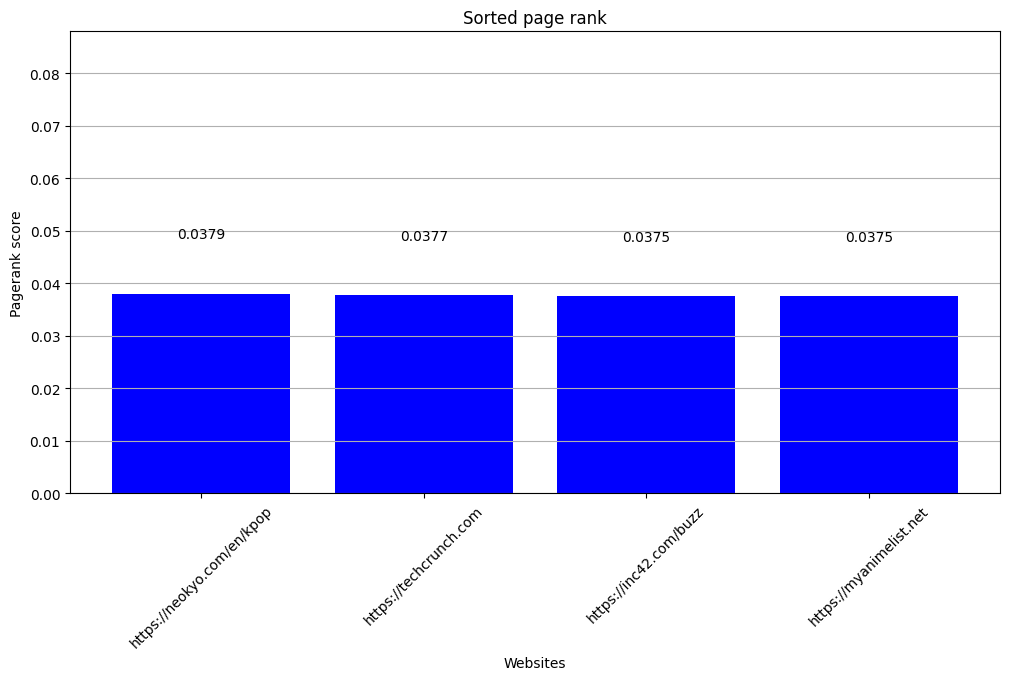

In [ ]:
plot_sorted_pagerank(pagerank)


PageRank Scores:
https://techcrunch.com/: 0.0251
https://www.reddit.com/: 0.0250
https://www.myntra.com/: 0.0250
https://towardsdatascience.com/: 0.0250
https://www.freecodecamp.org/: 0.0250
https://realpython.com/: 0.0250


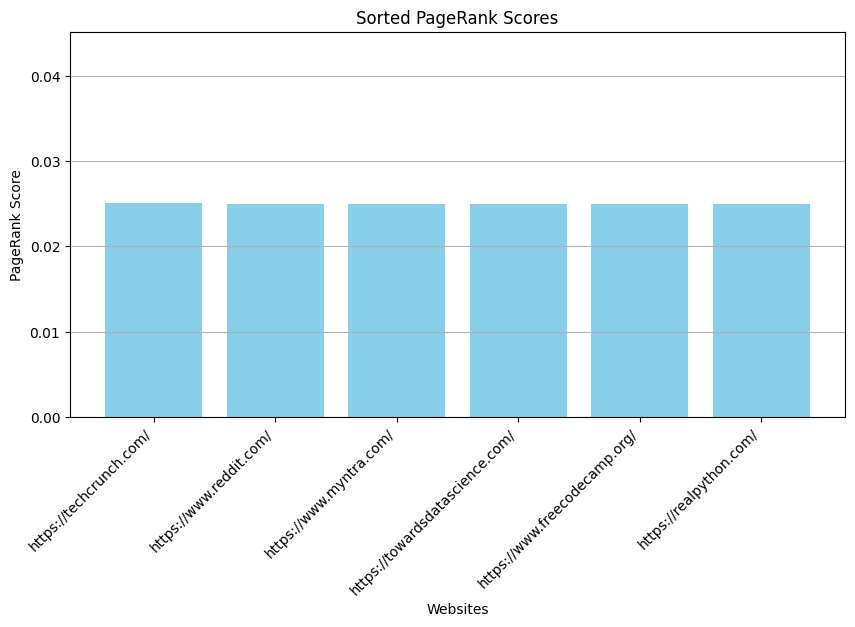

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Function to scrape links from a webpage
def get_links(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        return {a['href'] for a in soup.find_all('a', href=True)}
    except Exception:
        return set()

# URLs to analyze
websites = ['https://www.reddit.com/', 'https://www.myntra.com/', 'https://techcrunch.com/', 'https://towardsdatascience.com/','https://www.freecodecamp.org/','https://realpython.com/']
damping_factor = 0.85
iterations = 100
pagerank = {url: 1 / len(websites) for url in websites}
link_map = {url: get_links(url) for url in websites}

# Calculate PageRank scores
for _ in range(iterations):
  new_pagerank={}
  for url in websites:
    new_rank = (1-damping_factor)/len(websites)
    for l_url in link_map:
      if url in link_map[l_url]:
        new_rank += damping_factor*(pagerank[l_url]/len(link_map[l_url]))
    new_pagerank[url]=new_rank
  pagerank=new_pagerank

# Display and plot PageRank
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("\nPageRank Scores:")
for url, rank in sorted_pagerank:
    print(f"{url}: {rank:.4f}")

# Plotting
def plot_pagerank(pagerank):
    urls, ranks = zip(*sorted(pagerank.items(), key=lambda x: x[1], reverse=True))
    plt.figure(figsize=(10,5))
    plt.bar(urls, ranks, color='skyblue')
    plt.xlabel('Websites')
    plt.ylabel('PageRank Score')
    plt.title("Sorted PageRank Scores")
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, max(ranks) + 0.02)
    plt.grid(axis='y')
    plt.show()

plot_pagerank(pagerank)


In [ ]:
#-------------------------------------------------------

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
def get_links(url):
  try:
    response=requests.get(url)
    soup=BeautifulSoup(response.content,'html.parser')
    return {a['herf'] for a in soup.find_all('a',href=True)}
  except Exception:
    return set()

In [ ]:
websites=['https://towardsdatascience.com/','https://realpython.com/','https://techcrunch.com/','https://www.reddit.com/']

In [ ]:
damp=0.85
iter=100
pagerank = {url : 1/len(websites) for url in websites}
linkmap = {url : get_links(url) for url in websites}

In [ ]:
for _ in range(iter):
  newpgrank={}
  for url in websites:
    rank=(1-damp)/len(websites)
    for linkurl in linkmap:
      if url in linkmap[linkurl]:
        rank+=damp*(pagerank[linkurl]/len(linkmap[linkurl]))
    newpgrank[url]=rank
  pagerank=newpgrank

print("Sorted ranks :")
sorted_pg=sorted(pagerank.items(), key=lambda x:x[1], reverse=True)
for i in sorted_pg:
  print(i)

Sorted ranks :
('https://towardsdatascience.com/', 0.037500000000000006)
('https://realpython.com/', 0.037500000000000006)
('https://techcrunch.com/', 0.037500000000000006)
('https://www.reddit.com/', 0.037500000000000006)


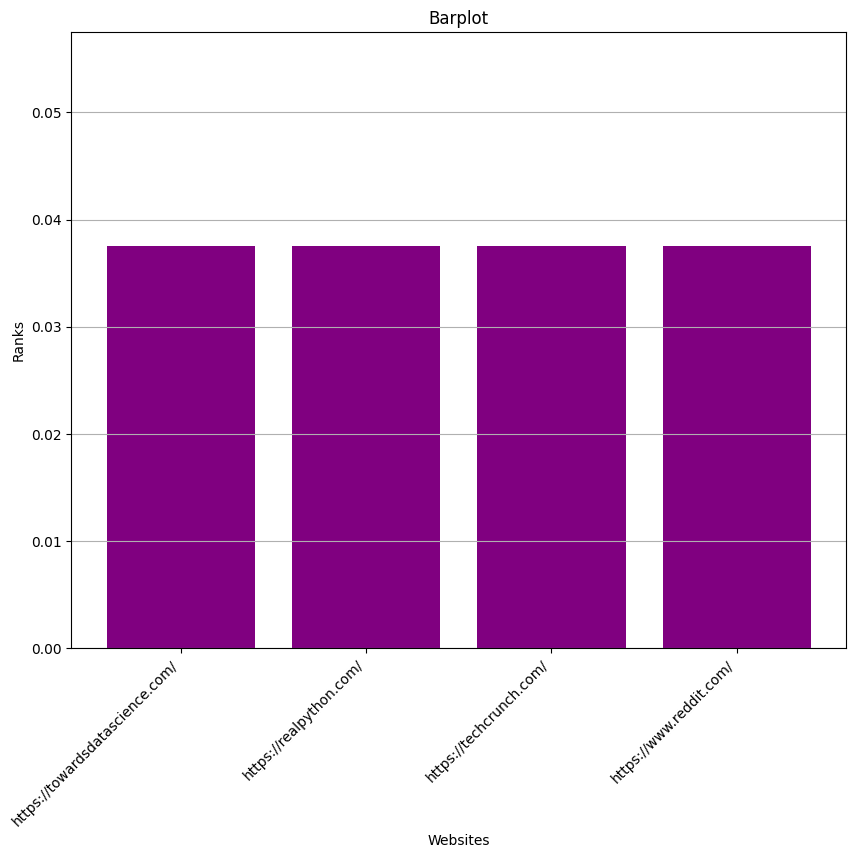

In [ ]:
def plotgraph(pagerank):
  urls,ranks=zip(*sorted(pagerank.items(),key=lambda x:x[1], reverse=True))
  plt.figure(figsize=(10,8))
  plt.bar(urls,ranks,color="Purple")
  plt.xlabel("Websites")
  plt.ylabel("Ranks")
  plt.title("Barplot")
  plt.xticks(rotation=45, ha="right")
  plt.ylim(0, max(ranks)+0.02)
  plt.grid(axis='y')
  plt.show()

plotgraph(pagerank)